In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline  # regular scikit-learn pipeline


import dask 
import dask.dataframe as dd
from dask_ml.preprocessing import Categorizer, DummyEncoder, StandardScaler
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LogisticRegression, LinearRegression
from dask_ml.decomposition import PCA
from dask_ml.cluster import KMeans






In [4]:
ddf = dd.read_csv("/scratch/vp91/Training/ML-Data/CalCOFI_bottle.csv", dtype={
       'O2Satq': 'float64',
       'O_qual': 'float64',
       'PO4q': 'float64',
       'S_prec': 'float64',
       'T_prec': 'float64',
       'C14A1q': 'float64',
       'C14A2q': 'float64',
       'Chlqua': 'float64',
       'DIC Quality Comment': 'object',
       'DarkAq': 'float64',
       'IncTim': 'object',
       'MeanAq': 'float64',
       'NH3q': 'float64',
       'NO2q': 'float64',
       'NO3q': 'float64',
       'P_qual': 'float64',
       'Phaqua': 'float64',
       'SiO3qu': 'float64'})
ddf.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ddf = ddf[['Depthm', 'Salnty', 'STheta', 'R_PRES', 'T_degC', 'O2ml_L']]
ddf.head()

,Depthm,Salnty,STheta,R_PRES,T_degC,O2ml_L
0,0,33.440,25.649,0,10.50,NaN
1,8,33.440,25.656,8,10.46,NaN
2,10,33.437,25.654,10,10.46,NaN
3,19,33.420,25.643,19,10.45,NaN
4,20,33.421,25.643,20,10.45,NaN


In [6]:
ddf = ddf.dropna()

In [7]:
pipe = Pipeline([('reduce_dim', PCA()), 
                 ('normal', StandardScaler()),
                 ('cluster', KMeans(n_clusters = 3, random_state = 0, n_init='auto'))
                ])

In [8]:
pipe

Pipeline(steps=[('reduce_dim', PCA()), ('normal', StandardScaler()),
                ('cluster', KMeans(n_clusters=3, random_state=0))])

In [9]:
kmeans = pipe.fit(ddf.to_dask_array(lengths=True))

<Axes: xlabel='T_degC', ylabel='Salnty'>

/scratch/vp91/Training/python3.9-venv/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/scratch/vp91/Training/python3.9-venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


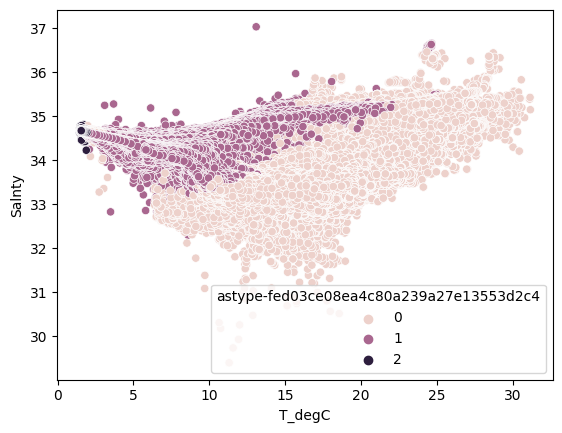

In [10]:
sns.scatterplot(data = ddf, x = 'T_degC', y = 'Salnty', hue = pipe['cluster'].labels_)